In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("BlinkIT_Grocery_Data.csv")

In [9]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Missing Check,Visibility Category
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,OK,High
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,OK,Low
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,OK,Low
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,OK,Low
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,OK,Low


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
 12  Missing Check              8523 non-null   object 
 13  Visibility Category        8523 non-null   objec

In [4]:
cols = ['Sales', 'Item Visibility', 'Item Weight', 'Rating']
df_num = df[cols]

In [5]:
df_num.isna().sum()

Sales                 0
Item Visibility       0
Item Weight        1463
Rating                0
dtype: int64

In [6]:
df_num = df_num.dropna()

In [7]:
df_num.isna().sum()

Sales              0
Item Visibility    0
Item Weight        0
Rating             0
dtype: int64

***The Correlation Matrix***

In [17]:
corr = df_num.corr()
print(corr)

                    Sales  Item Visibility  Item Weight    Rating
Sales            1.000000        -0.006061     0.027146  0.009186
Item Visibility -0.006061         1.000000    -0.014025 -0.002384
Item Weight      0.027146        -0.014025     1.000000  0.002709
Rating           0.009186        -0.002384     0.002709  1.000000


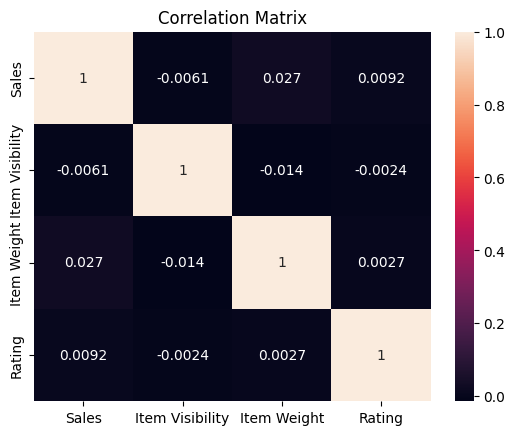

In [18]:
plt.figure()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Item visibility has very weak or near-zero correlation
# Rating also has near-zero correlation, meaning there is no relation between high rating and high sales
#Almost none of the things have a relation with anything.

***Boxplot***

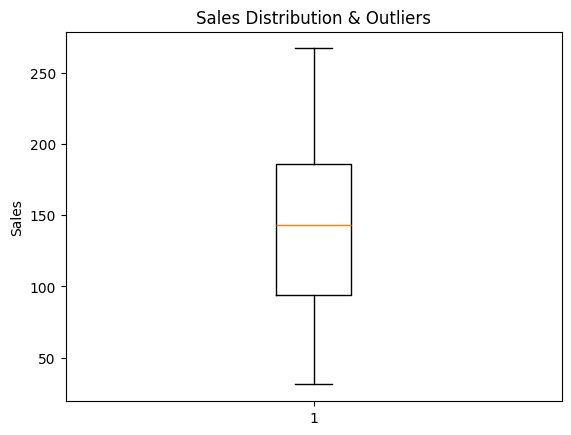

In [19]:
plt.figure()
plt.boxplot(df['Sales'])
plt.title("Sales Distribution & Outliers")
plt.ylabel("Sales")
plt.show()

In [1]:
#Median sales lie around ₹140–145, indicating the typical price range of most items.
#Sales distribution is right-skewed, where a small number of high-value items contribute disproportionately to total revenue.
#No extreme outliers detected, suggesting the dataset is clean and high sales values are genuine.

In [21]:
#grouped Validation
grouped = df.groupby('Outlet Location Type')['Sales'].mean()
print(grouped)

Outlet Location Type
Tier 1    140.870106
Tier 2    141.167198
Tier 3    140.935234
Name: Sales, dtype: float64


***Scatter Plot***

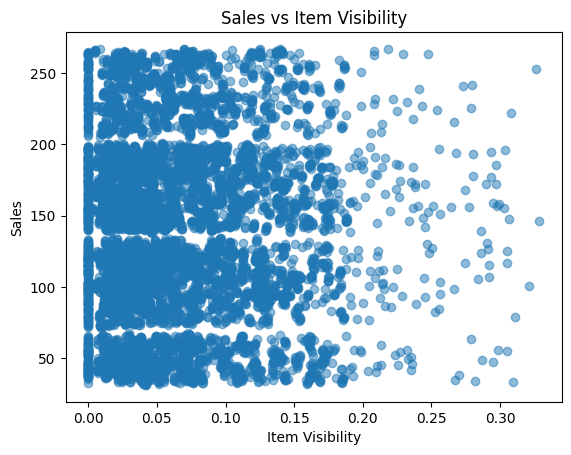

In [8]:
plt.figure()
plt.scatter(df['Item Visibility'], df['Sales'], alpha=0.5)
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.title("Sales vs Item Visibility")
plt.show()

In [ ]:
#From this chart, we can conclude that high visibility doesn't mean high sales.
#High sales occur even at the low or medium visibility.